# **Installation**

In [28]:
!wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
!apt install fonts-thai-tlwg
!pip install --upgrade pythainlp
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

--2021-06-18 16:48:46--  https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
Resolving awards.opdc.go.th (awards.opdc.go.th)... 164.115.76.22
Connecting to awards.opdc.go.th (awards.opdc.go.th)|164.115.76.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18054 (18K) [text/html]
Saving to: ‚ÄòTHSarabunNew.ttf.3‚Äô

THSarabunNew.ttf.3  100%[===================>]  17.63K  --.-KB/s    in 0s      

2021-06-18 16:48:50 (266 MB/s) - ‚ÄòTHSarabunNew.ttf.3‚Äô saved [18054/18054]

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-thai-tlwg is already the newest version (1:0.6.4-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Requirement already up-to-date: pythainlp in /usr/local/lib/python3.7/dist-packages (2.3.1)
  Using cached https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
  Created w

# **Import Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
from datetime import date
import seaborn as sns

import pythainlp 
from pythainlp.corpus.common import *
from pythainlp.util import normalize
from pythainlp import Tokenizer

# Set font
font_list = fm.createFontList(['THSarabunChula-Regular.ttf'])
print(font_list)
fm.fontManager.ttflist.extend(font_list)
# fm.fontManager.addfont(font_list)
plt.rcParams['font.family'] = 'TH Sarabun Chula'
plt.rcParams['xtick.labelsize'] = 20.0
plt.rcParams['ytick.labelsize'] = 20.0
csfont = {'fontname':'TH Sarabun Chula'}

[<Font 'TH Sarabun Chula' (THSarabunChula-Regular.ttf) normal normal regular normal>]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


# **Import Data**

In [30]:
# get a dataframe from xlsx object
# *change github url into raw github url for valid data retrieving
url = 'https://raw.githubusercontent.com/PaoLastHope/BADS7105/fd14ca3a3a06f63bd23bd24e0cbae9330e8de2eb/HOMEWORK%2001/Customer%20Behaviors%20(Responses).xlsx'
xls = pd.ExcelFile(url)
df = pd.read_excel(xls, 'Form Responses 1')
df.head(5)

Timestamp  ...   ‡πÄ‡∏û‡∏®
0 2021-01-09 10:07:27.365  ...   ‡∏ä‡∏≤‡∏¢
1 2021-01-09 10:07:34.010  ...  ‡∏´‡∏ç‡∏¥‡∏á
2 2021-01-09 10:07:35.902  ...   ‡∏ä‡∏≤‡∏¢
3 2021-01-09 10:07:36.476  ...   ‡∏ä‡∏≤‡∏¢
4 2021-01-09 10:07:41.965  ...  ‡∏´‡∏ç‡∏¥‡∏á

[5 rows x 64 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 64 columns):
 #   Column                                                                             Non-Null Count  Dtype         
---  ------                                                                             --------------  -----         
 0   Timestamp                                                                          63 non-null     datetime64[ns]
 1   ‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ô‡πÉ‡∏à‡πÉ‡∏ô‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏°‡∏≤‡∏Å‡∏ô‡πâ‡∏≠‡∏¢‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡πÉ‡∏î [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ç‡∏µ‡πà‡∏õ‡∏∏‡πà‡∏ô]                           63 non-null     object        
 2   ‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ô‡πÉ‡∏à‡πÉ‡∏ô‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏°‡∏≤‡∏Å‡∏ô‡πâ‡∏≠‡∏¢‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡πÉ‡∏î [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏∂‡∏ô]                               63 non-null     object        
 3   ‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ô‡πÉ‡∏à‡πÉ‡∏ô‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏°‡∏≤‡∏Å‡∏ô

# **Cleaning**

In [32]:
 # drop first column
df.drop(df.columns[0], axis=1, inplace=True)  

 # Edit header column
df.columns = df.columns.str.replace(r'(‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ô‡πÉ‡∏à‡πÉ‡∏ô‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏°‡∏≤‡∏Å‡∏ô‡πâ‡∏≠‡∏¢‡πÄ‡∏û‡∏µ‡∏¢‡∏á‡πÉ‡∏î)', 'Interest', regex=True).str.strip()
df.columns = df.columns.str.replace(r'(‡∏Ñ‡∏∏‡∏ì‡∏ö‡∏£‡∏¥‡πÇ‡∏†‡∏Ñ‡∏™‡∏¥‡πà‡∏á‡πÄ‡∏´‡∏•‡πà‡∏≤‡∏ô‡∏µ‡πâ‡∏ö‡πà‡∏≠‡∏¢‡∏Ç‡∏ô‡∏≤‡∏î‡πÑ‡∏´‡∏ô)', 'Consume', regex=True).str.strip()
df.columns = df.columns.str.replace(r'(‡∏ô‡∏≠‡∏Å‡πÄ‡∏´‡∏ô‡∏∑‡∏≠‡∏à‡∏≤‡∏Å‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏î‡∏±‡∏á‡∏Å‡∏•‡πà‡∏≤‡∏ß‡πÅ‡∏•‡πâ‡∏ß ‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏ô‡πÉ‡∏à‡πÉ‡∏ô‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÉ‡∏î‡∏≠‡∏µ‡∏Å‡∏ö‡πâ‡∏≤‡∏á)', 'Remark', regex=True).str.strip()
df.columns = df.columns.str.replace(r'(‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏Å‡∏¥‡∏î‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏ó‡πà‡∏≤‡πÑ‡∏´‡∏£‡πà)', 'BirthDay', regex=True).str.strip()
df.columns = df.columns.str.replace(r'(‡πÄ‡∏û‡∏®)', 'Gender', regex=True).str.strip()
df['Gender'] = df['Gender'].str.replace('‡∏ä‡∏≤‡∏¢','M')
df['Gender'] = df['Gender'].str.replace('‡∏´‡∏ç‡∏¥‡∏á','F')


 # add new coloumn "Age" by calculate from birth date
age = []
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

for d in df['BirthDay']:
    if d.year > 2500:                # fix ‡∏û‡∏® -> ‡∏Ñ‡∏®
       y = d.year - 543
       d = d.replace(year=y)      
    age.append(int(calculate_age(d)))
df['Age'] = age

# **View Distribution**

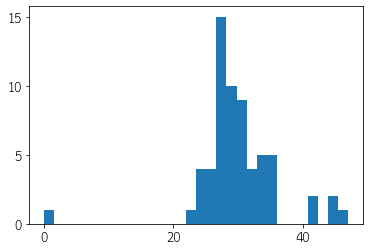

In [33]:
df['Age'].hist(grid=False, bins=30)

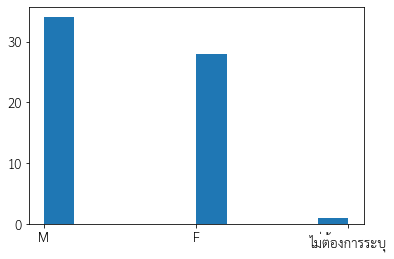

In [34]:
df['Gender'].hist(grid=False)
df = df.loc[df['Gender'] != '‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏£‡∏∞‡∏ö‡∏∏']   # just one record

# Frequency plot 

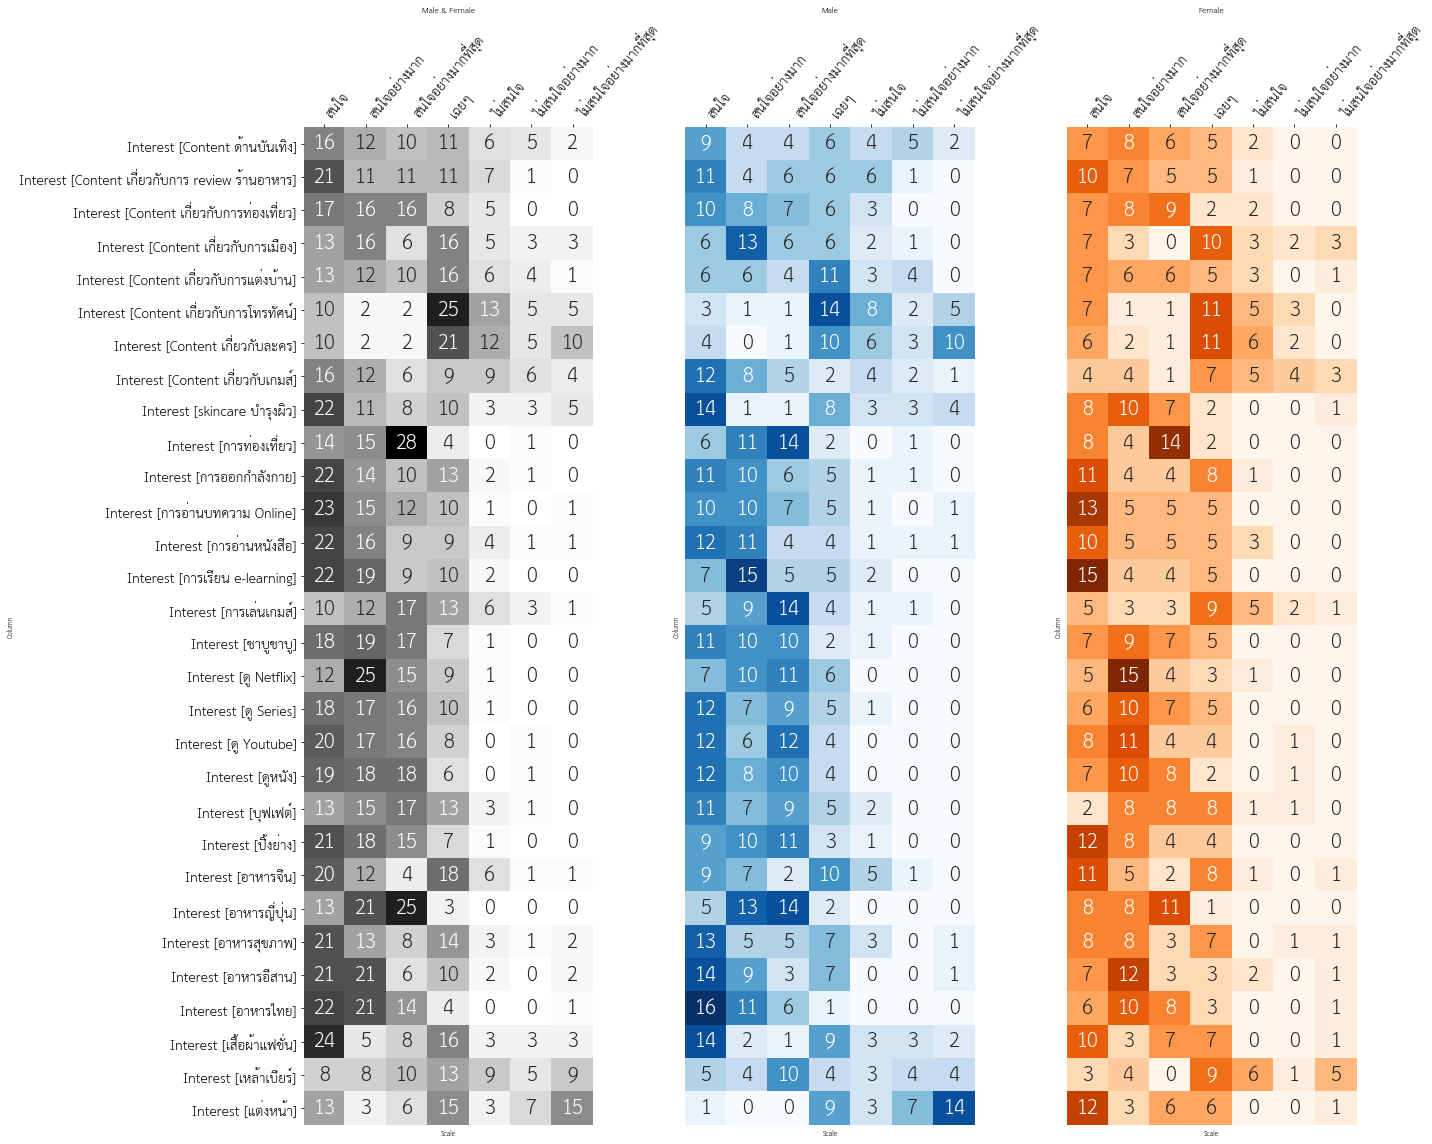

In [35]:
df_i_mf = df.iloc[:,:30].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_i_mf = df_i_mf.size().pivot('Column','Scale','size').fillna(0)
df_i_m = df[df['Gender']=='M'].iloc[:,:30].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_i_m = df_i_m.size().pivot('Column','Scale','size').fillna(0)
df_i_f = df[df['Gender']=='F'].iloc[:,:30].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_i_f = df_i_f.size().pivot('Column','Scale','size').fillna(0)

plt.subplots(1,3, figsize=(20,16), tight_layout=True)

#1
plt.subplot(1,3,1)
ax = sns.heatmap(df_i_mf, cmap='Greys', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Male & Female')

#2
plt.subplot(1,3,2)
ax = sns.heatmap(df_i_m, cmap='Blues', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Male')
ax.set_yticks([])

#3
plt.subplot(1,3,3)
ax = sns.heatmap(df_i_f, cmap='Oranges', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Female')
ax.set_yticks([])

plt.show()

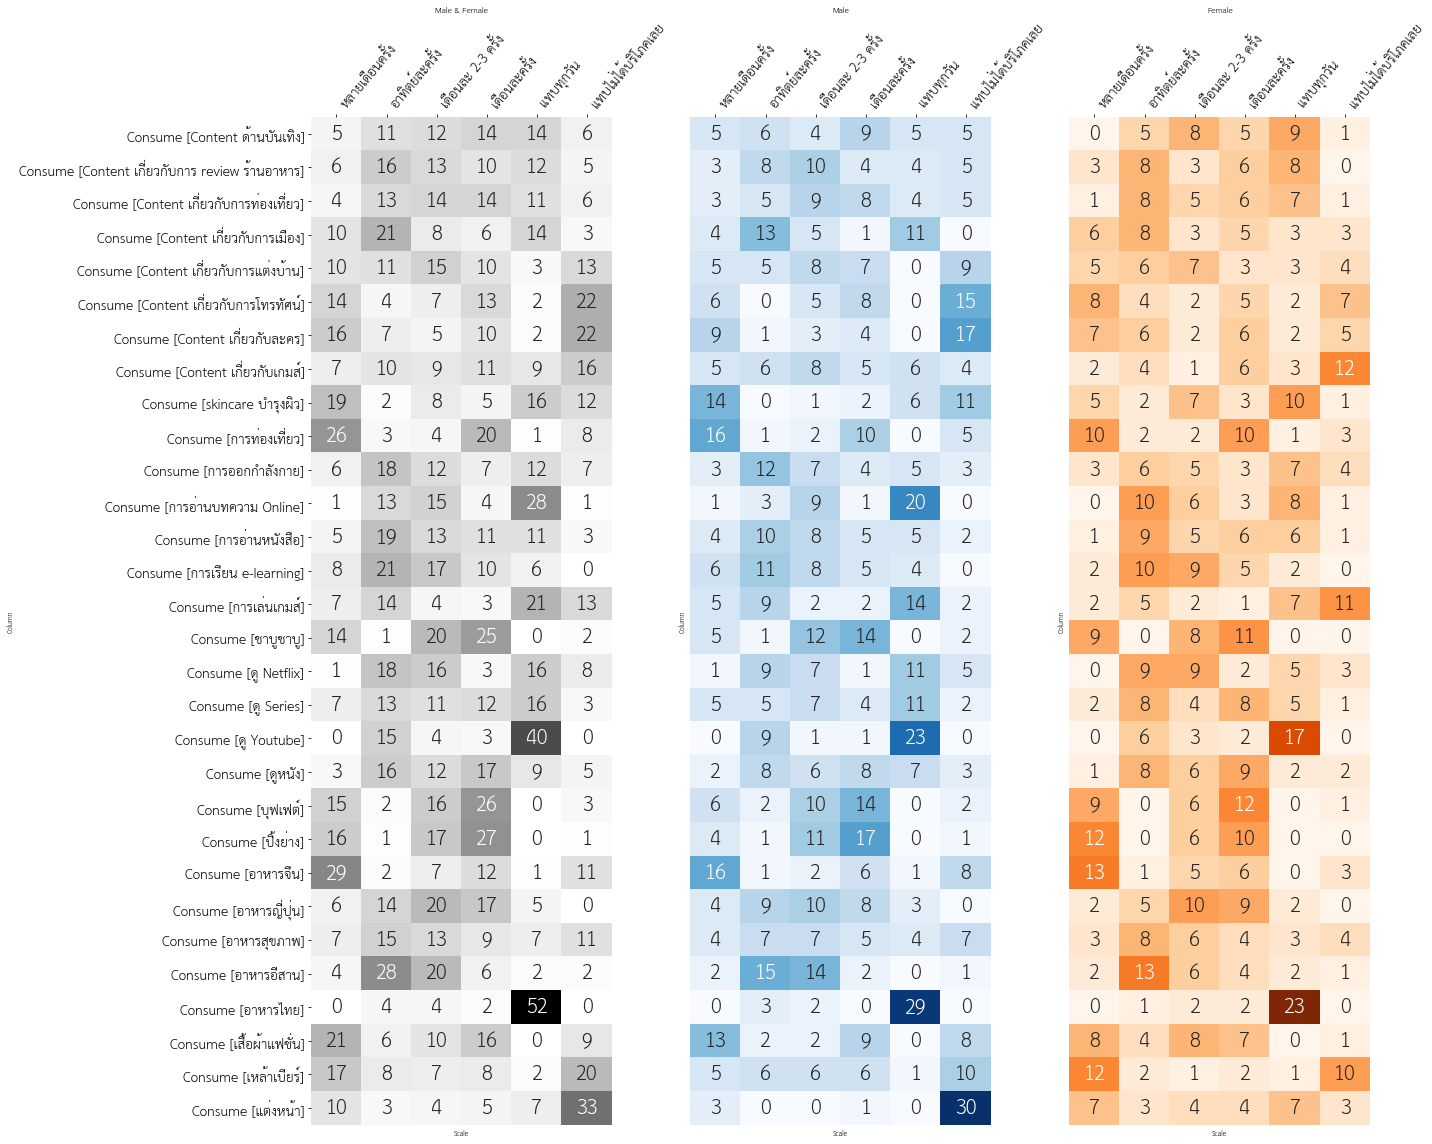

In [36]:
df_c_mf = df.iloc[:,30:60].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_c_mf = df_c_mf.size().pivot('Column','Scale','size').fillna(0)
df_c_m = df[df['Gender']=='M'].iloc[:,30:60].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_c_m = df_c_m.size().pivot('Column','Scale','size').fillna(0)
df_c_f = df[df['Gender']=='F'].iloc[:,30:60].melt(var_name='Column', value_name='Scale').groupby(['Scale','Column'], as_index=False)
df_c_f = df_c_f.size().pivot('Column','Scale','size').fillna(0)

plt.subplots(1,3, figsize=(20,16), tight_layout=True)

#1
plt.subplot(1,3,1)
ax = sns.heatmap(df_c_mf, cmap='Greys', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Male & Female')

#2
plt.subplot(1,3,2)
ax = sns.heatmap(df_c_m, cmap='Blues', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Male')
ax.set_yticks([])

#3
plt.subplot(1,3,3)
ax = sns.heatmap(df_c_f, cmap='Oranges', annot=True, vmin=0, cbar=False, annot_kws={"size": 30 })
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='left')
ax.xaxis.set_ticks_position('top')
ax.set_title('Female')
ax.set_yticks([])

plt.show()

## Correlation

In [37]:
# mapping categorical data with scale
int_scale = {'‡πÑ‡∏°‡πà‡∏™‡∏ô‡πÉ‡∏à‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î': 1, '‡πÑ‡∏°‡πà‡∏™‡∏ô‡πÉ‡∏à‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å': 2, '‡πÑ‡∏°‡πà‡∏™‡∏ô‡πÉ‡∏à': 3, '‡πÄ‡∏â‡∏¢‡πÜ': 4, '‡∏™‡∏ô‡πÉ‡∏à': 5, '‡∏™‡∏ô‡πÉ‡∏à‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å': 6, '‡∏™‡∏ô‡πÉ‡∏à‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î': 7}
con_scale = {'‡πÅ‡∏ó‡∏ö‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏ö‡∏£‡∏¥‡πÇ‡∏†‡∏Ñ‡πÄ‡∏•‡∏¢': 1, '‡∏´‡∏•‡∏≤‡∏¢‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 2, '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏•‡∏∞‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 3, '‡πÄ‡∏î‡∏∑‡∏≠‡∏ô‡∏•‡∏∞ 2-3 ‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 4, '‡∏≠‡∏≤‡∏ó‡∏¥‡∏ï‡∏¢‡πå‡∏•‡∏∞‡∏Ñ‡∏£‡∏±‡πâ‡∏á': 5, '‡πÅ‡∏ó‡∏ö‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô': 6}
df_cop = df.copy()
for col in df_cop.columns[:30]:
    df_cop[col] = df_cop[col].map(int_scale)
for col in df_cop.columns[30:60]:
    df_cop[col] = df_cop[col].map(con_scale)
df_tmp = df_cop[list(df.columns[:60])]

In [38]:
df_tmp.head()

Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ç‡∏µ‡πà‡∏õ‡∏∏‡πà‡∏ô]  ...  Consume [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÄ‡∏°‡∏∑‡∏≠‡∏á]
0                        5  ...                                    6
1                        6  ...                                    5
2                        7  ...                                    6
3                        5  ...                                    4
4                        6  ...                                    4

[5 rows x 60 columns]

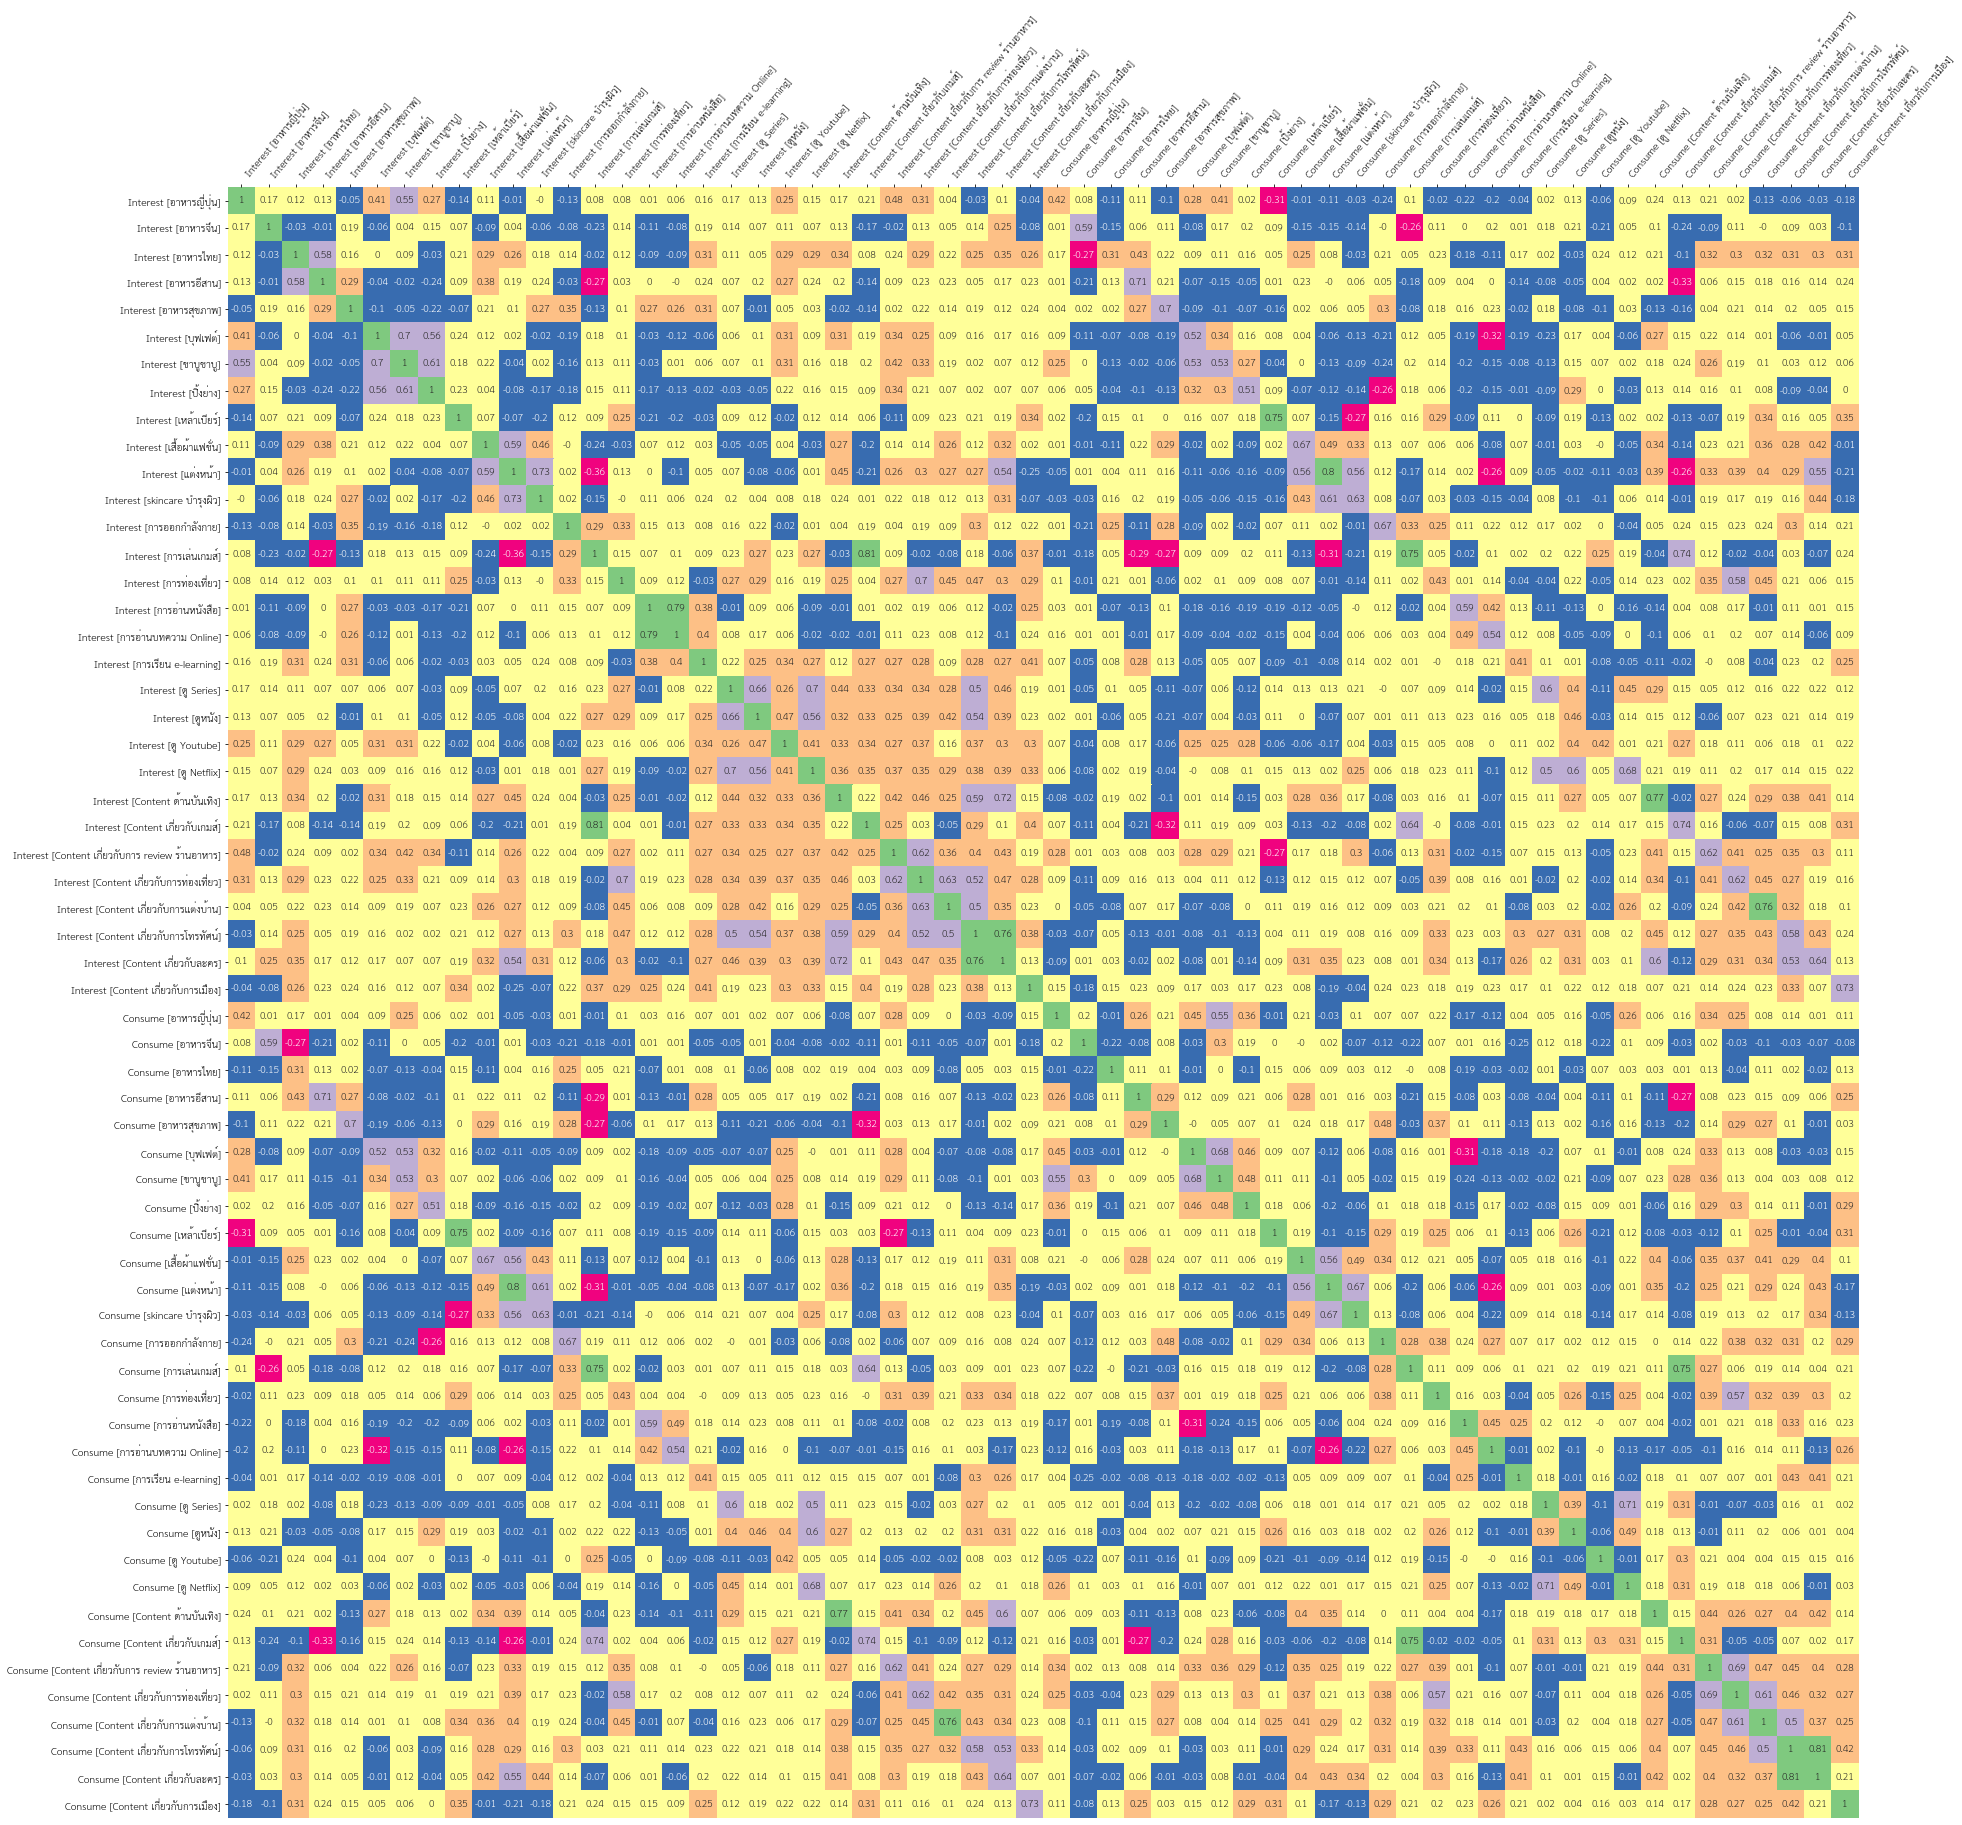

In [39]:
# Correlation
df_corr = df_tmp.corr()
for col in df_corr.columns[:]:
    df_corr[col] = np.round(df_corr[col].astype(float),decimals=2)   # round 
# Display heatmap
plt.figure(figsize=(30,30))
ax = sns.heatmap(df_corr , cmap='Accent_r', vmin=-1, vmax=1, annot=True, square=True, cbar=False , annot_kws={"size": 15 })
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=15, ha='left', **csfont)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, **csfont )
plt.show()

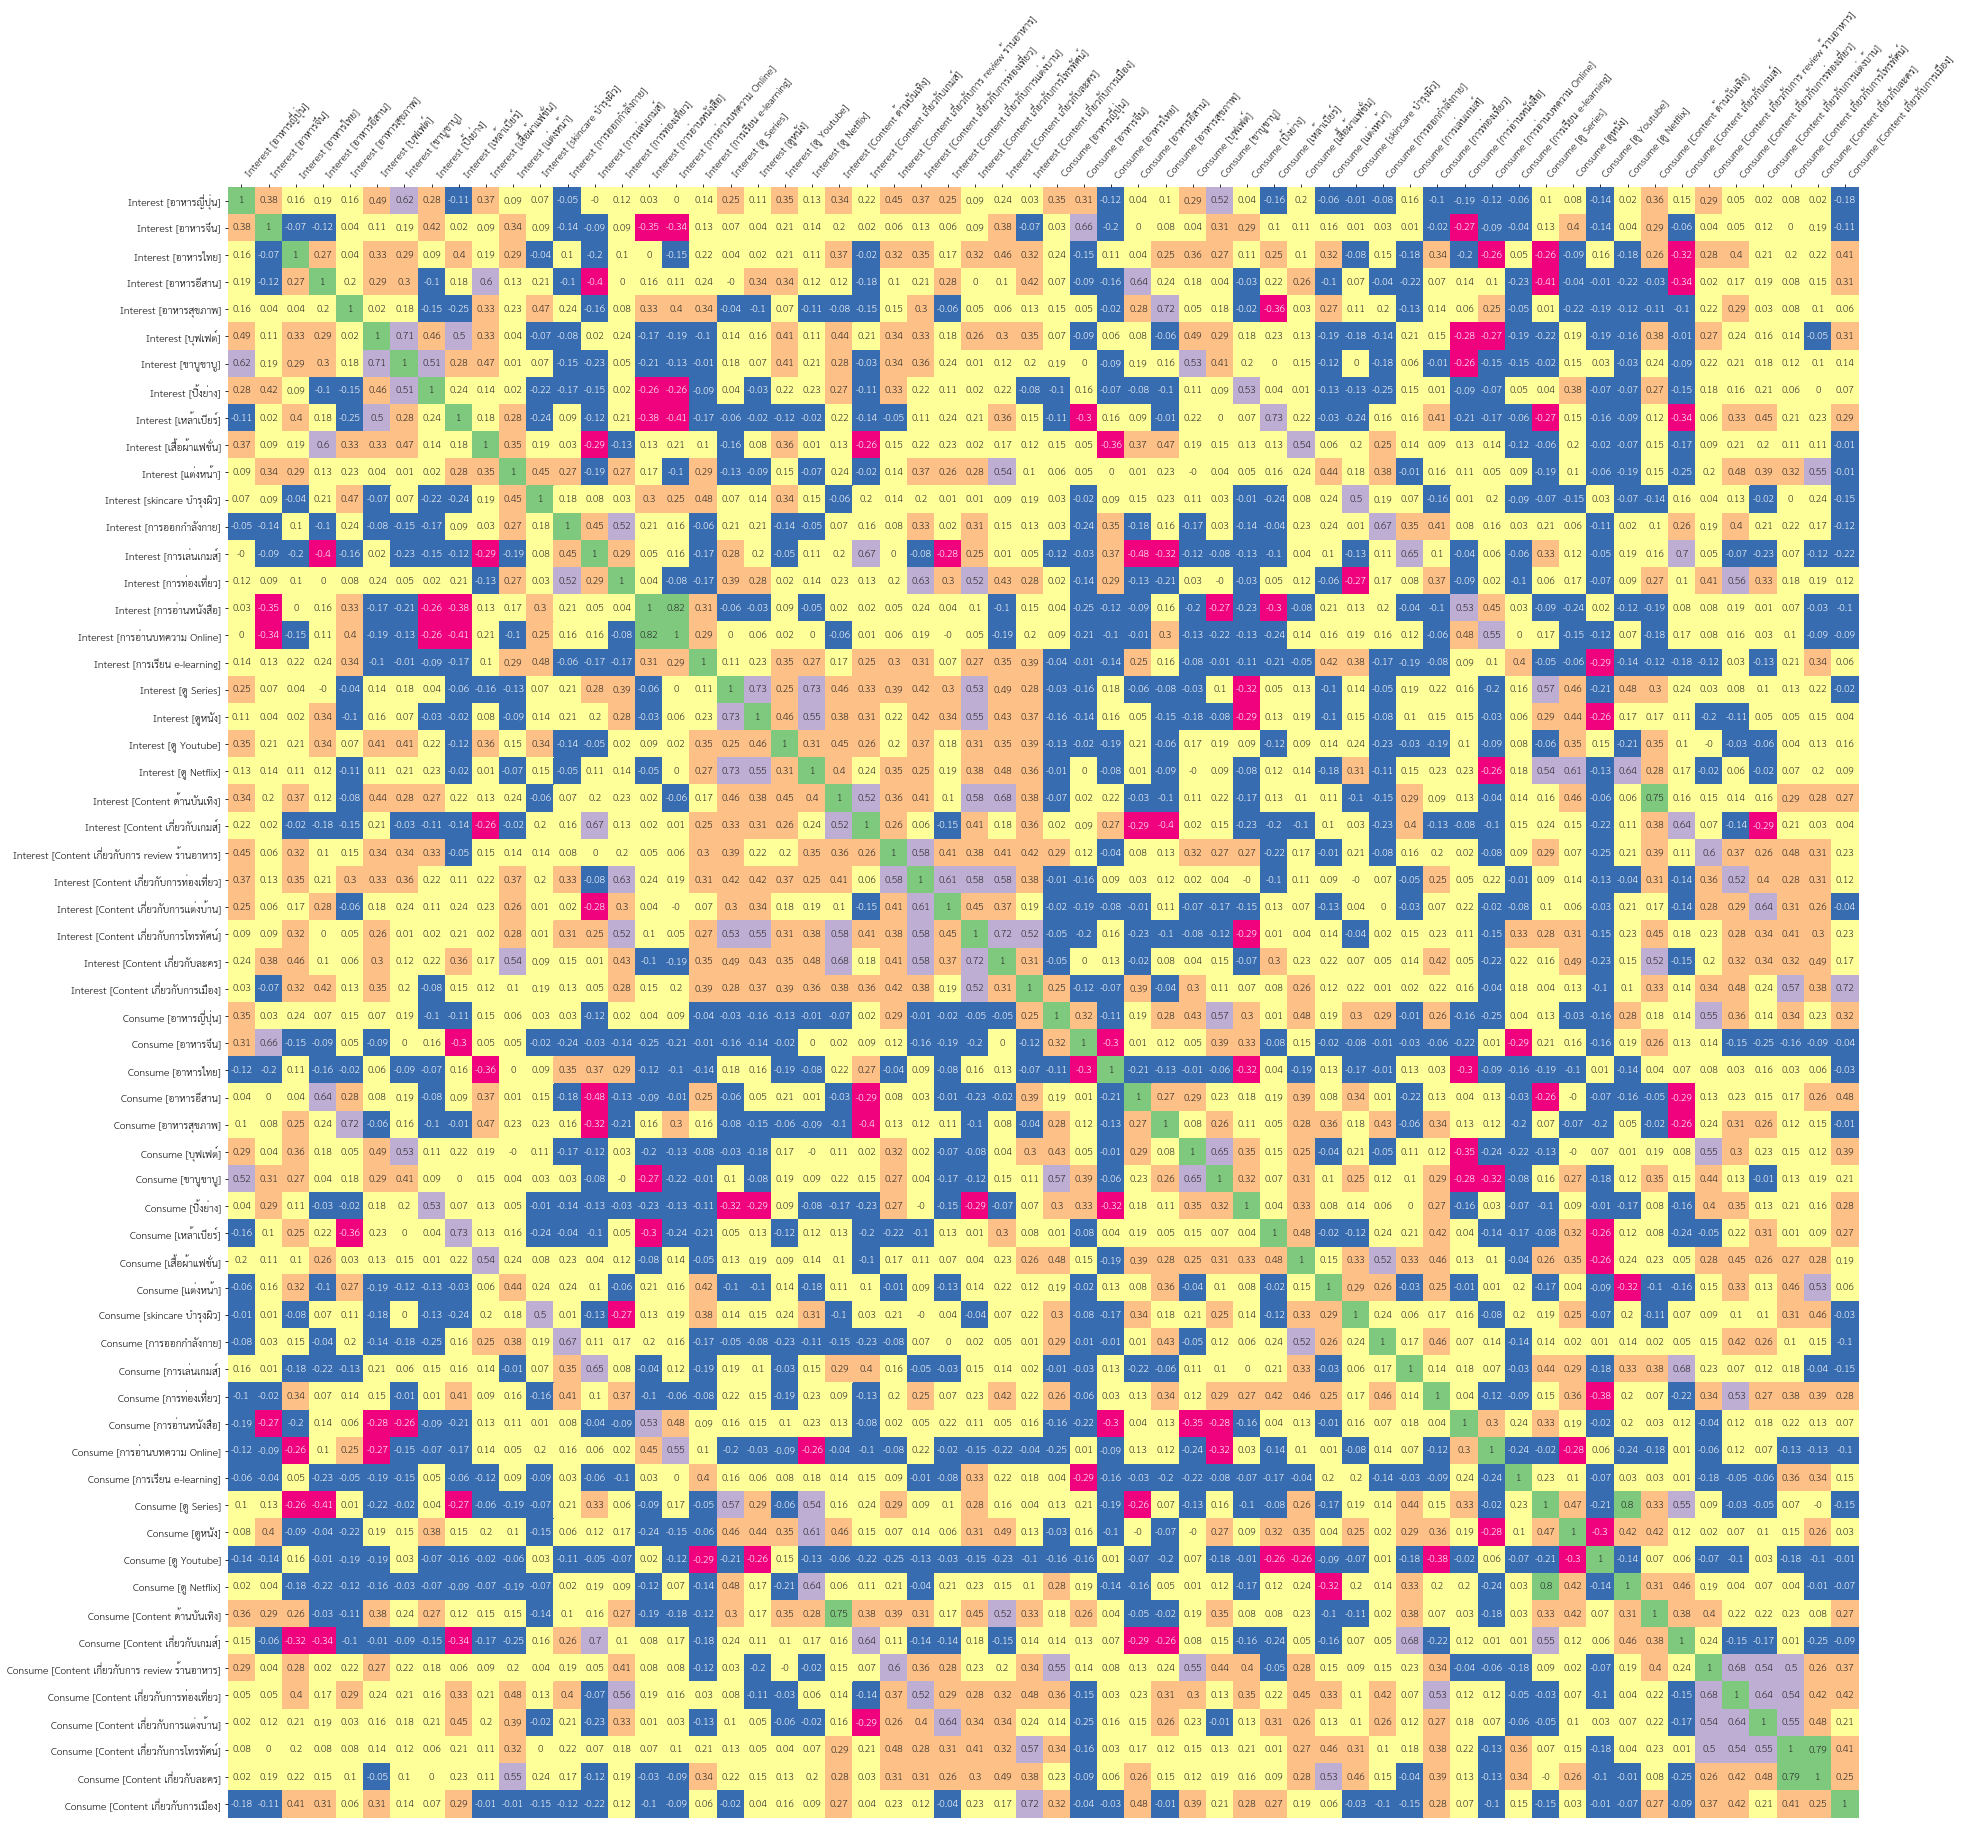

In [40]:
# Male Correlation
df_tmp = df_cop[df_cop['Gender']=='M']
df_corr_m = df_tmp[list(df_tmp.columns[:60])].corr()
for col in df_corr_m.columns[:]:
    df_corr_m[col] = np.round(df_corr_m[col].astype(float),decimals=2)   # round 

# Display heatmap
plt.figure(figsize=(30,30))
ax = sns.heatmap(df_corr_m , cmap='Accent_r', vmin=-1, vmax=1, annot=True, square=True, cbar=False, annot_kws={"size": 15 })
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=15, ha='left', **csfont )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, **csfont )
plt.show()

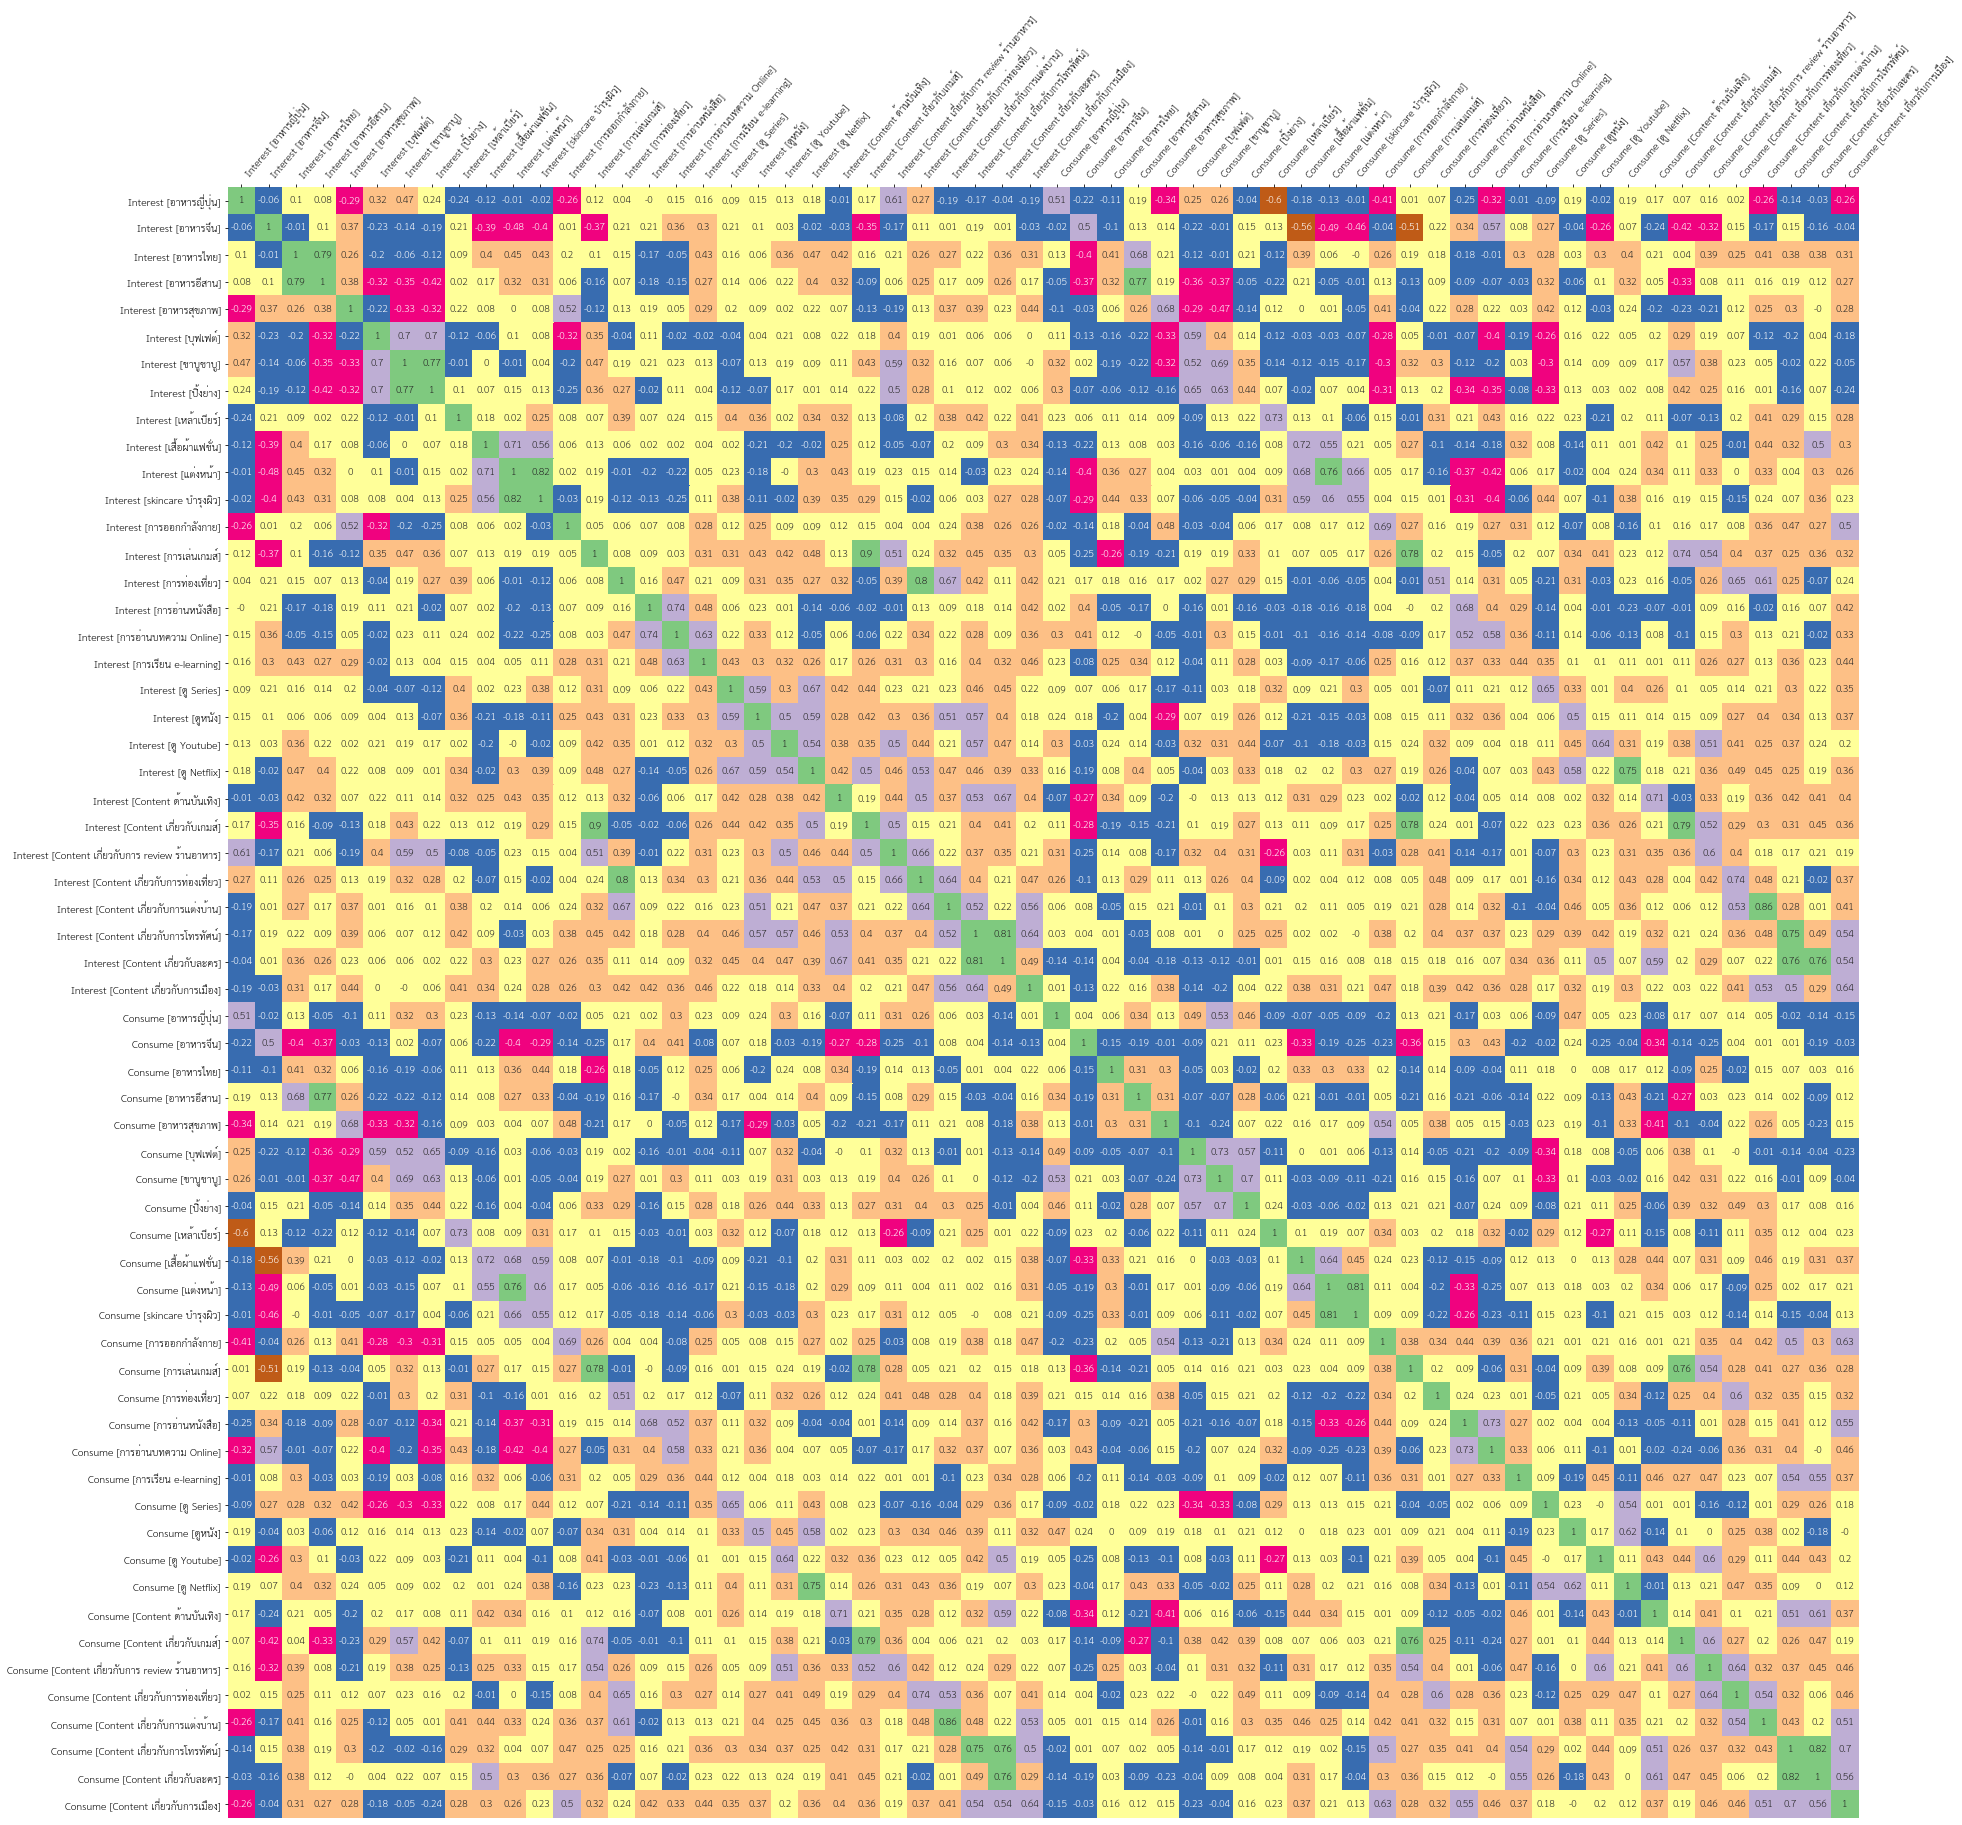

In [41]:
# Female Correlation
df_tmp = df_cop[df_cop['Gender']=='F']
df_corr_f = df_tmp[list(df_tmp.columns[:60])].corr()
for col in df_corr_f.columns[:]:
    df_corr_f[col] = np.round(df_corr_f[col].astype(float),decimals=2)   # round 
# Display heatmap
plt.figure(figsize=(30,30))
ax = sns.heatmap(df_corr_f , cmap='Accent_r', vmin=-1, vmax=1, annot=True, square=True, cbar=False, annot_kws={"size": 15 })
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, fontsize=15, ha='left', **csfont )
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, **csfont )
plt.show()

## Correlation Score

In [65]:
# Remove duplation correlation items
def remove_dup_corr(df_in):
  df_out = df_in.stack().reset_index() 
  df_out = df_out[df_out['level_0'].astype(str)!=df_out['level_1'].astype(str)]
  df_out['X'] = df_out.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
  df_out = df_out.drop_duplicates(['X'])
  df_out.drop(['X'], axis=1, inplace=True)    
  df_out.columns = ['Topic 1', 'Topic 2', 'Score']      
  df_out = df_out.sort_values('Score', ascending=False)   
  return df_out    

In [66]:
df_score = remove_dup_corr(df_corr) # Correlation Score both Male and Female
df_score 

Topic 1  ... Score
803                  Interest [‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡πà‡∏ô‡πÄ‡∏Å‡∏°‡∏™‡πå]  ...  0.81
3478  Consume [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÇ‡∏ó‡∏£‡∏ó‡∏±‡∏®‡∏ô‡πå]  ...  0.81
640                      Interest [‡πÅ‡∏ï‡πà‡∏á‡∏´‡∏ô‡πâ‡∏≤]  ...  0.80
916                Interest [‡∏Å‡∏≤‡∏£‡∏≠‡πà‡∏≤‡∏ô‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠]  ...  0.79
1372          Interest [Content ‡∏î‡πâ‡∏≤‡∏ô‡∏ö‡∏±‡∏ô‡πÄ‡∏ó‡∏¥‡∏á]  ...  0.77
...                                      ...  ...   ...
820                  Interest [‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡πà‡∏ô‡πÄ‡∏Å‡∏°‡∏™‡πå]  ... -0.31
1414      Interest [Content ‡πÄ‡∏Å‡∏µ‡πà‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡πÄ‡∏Å‡∏°‡∏™‡πå]  ... -0.32
346                       Interest [‡∏ö‡∏∏‡∏ü‡πÄ‡∏ü‡∏ï‡πå]  ... -0.32
233                    Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏≠‡∏µ‡∏™‡∏≤‡∏ô]  ... -0.33
613                      Interest [‡πÅ‡∏ï‡πà‡∏á‡∏´‡∏ô‡πâ‡∏≤]  ... -0.36

[1770 rows x 3 columns]

In [67]:
df_score_m = remove_dup_corr(df_corr_m) # Correlation Score Male
df_score_m

Topic 1  ... Score
916                Interest [‡∏Å‡∏≤‡∏£‡∏≠‡πà‡∏≤‡∏ô‡∏´‡∏ô‡∏±‡∏á‡∏™‡∏∑‡∏≠]  ...  0.82
2931                     Consume [‡∏î‡∏π Series]  ...  0.80
3478  Consume [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÇ‡∏ó‡∏£‡∏ó‡∏±‡∏®‡∏ô‡πå]  ...  0.79
1372          Interest [Content ‡∏î‡πâ‡∏≤‡∏ô‡∏ö‡∏±‡∏ô‡πÄ‡∏ó‡∏¥‡∏á]  ...  0.75
1099                    Interest [‡∏î‡∏π Series]  ...  0.73
...                                      ...  ...   ...
1414      Interest [Content ‡πÄ‡∏Å‡∏µ‡πà‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡πÄ‡∏Å‡∏°‡∏™‡πå]  ... -0.40
193                    Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏≠‡∏µ‡∏™‡∏≤‡∏ô]  ... -0.40
228                    Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏≠‡∏µ‡∏™‡∏≤‡∏ô]  ... -0.41
496                   Interest [‡πÄ‡∏´‡∏•‡πâ‡∏≤‡πÄ‡∏ö‡∏µ‡∏¢‡∏£‡πå]  ... -0.41
813                  Interest [‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡πà‡∏ô‡πÄ‡∏Å‡∏°‡∏™‡πå]  ... -0.48

[1770 rows x 3 columns]

In [68]:
df_score_f = remove_dup_corr(df_corr_f)  # Correlation Score Female
df_score_f

Topic 1  ... Score
803                   Interest [‡∏Å‡∏≤‡∏£‡πÄ‡∏•‡πà‡∏ô‡πÄ‡∏Å‡∏°‡∏™‡πå]  ...  0.90
1616  Interest [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÅ‡∏ï‡πà‡∏á‡∏ö‡πâ‡∏≤‡∏ô]  ...  0.86
3478   Consume [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÇ‡∏ó‡∏£‡∏ó‡∏±‡∏®‡∏ô‡πå]  ...  0.82
611                       Interest [‡πÅ‡∏ï‡πà‡∏á‡∏´‡∏ô‡πâ‡∏≤]  ...  0.82
1648  Interest [Content ‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡πÇ‡∏ó‡∏£‡∏ó‡∏±‡∏®‡∏ô‡πå]  ...  0.81
...                                       ...  ...   ...
70                        Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏∂‡∏ô]  ... -0.48
100                       Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏∂‡∏ô]  ... -0.49
103                       Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏∂‡∏ô]  ... -0.51
99                        Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏à‡∏∂‡∏ô]  ... -0.56
38                    Interest [‡∏≠‡∏≤‡∏´‡∏≤‡∏£‡∏ç‡∏µ‡πà‡∏õ‡∏∏‡πà‡∏ô]  ... -0.60

[1770 rows x 3 columns]

# Another Interesting Analyze 
# Using part of code from Homework 11

In [46]:
# Build thai words for tokenizer
th_words = []
th_words.extend(list(thai_words())) 
th_words.extend(list(thai_stopwords()))
th_words.extend(list(thai_negations()))
th_words.extend(list(countries()))
th_words.extend(list(provinces()))

# add additional words
from pathlib import Path

url_a1 = 'https://raw.githubusercontent.com/PaoLastHope/BADS7105/8001618620975c53c1742535958c124fdf207bef/HOMEWORK%2011/add_words.txt'
url_a2 = 'https://raw.githubusercontent.com/PaoLastHope/BADS7105/8001618620975c53c1742535958c124fdf207bef/HOMEWORK%2011/add_places.txt'
add_words = pd.read_fwf(url_a1, header=None)
add_places = pd.read_fwf(url_a2, header=None)
# additional words
th_words.extend(str(add_words).split('|')) 
th_words.extend(str(add_places).split('|')) 
th_words = set(th_words)

# remove from result list
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', '  ', '\n','/n/n','/n', '(', ')', ':', '‚Äì', '"', ',','ü§£','üòÜ']
screening_words = stopwords + removed_words

def tokenize_with_space(text):
  text = normalize(str(text))
  custom_tokenizer = Tokenizer(th_words)
  words = custom_tokenizer.word_tokenize(text=text)
  words = [x for x in words if (x not in removed_words)]
  print(words)
  merged = ''
  for word in words:
    word = normalize(word)
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [47]:
df['Remark_tokenized'] = df['Remark'].apply(lambda x: tokenize_with_space(x))

['‡∏Å‡∏µ‡∏¨‡∏≤', 'UFC', 'Soccer']
['‡∏Å‡∏µ‡∏¨‡∏≤', '‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á', '‡πÄ‡∏ó‡∏Ñ‡πÇ‡∏ô‡πÇ‡∏•‡∏¢‡∏µ']
['-']
['‡πÇ‡∏´‡∏£‡∏≤‡∏®‡∏≤‡∏™‡∏ï‡∏£‡πå', '‡∏î‡∏π‡∏î‡∏ß‡∏á']
['‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á']
['‡∏î‡πâ‡∏≤‡∏ô', '‡∏Å‡∏≤‡∏£‡∏≠‡∏≠‡∏°', '‡πÄ‡∏á‡∏¥‡∏ô', '‡∏ß‡∏≤‡∏á‡πÅ‡∏ú‡∏ô‡∏Å‡∏≤‡∏£', '‡πÉ‡∏ä‡πâ', '‡πÄ‡∏á‡∏¥‡∏ô']
['‡∏≠‡∏∏‡∏õ‡∏Å‡∏£‡∏ì‡πå', '‡πÑ‡∏≠‡∏ó‡∏µ']
['‡∏ü‡∏∏‡∏ï‡∏ö‡∏≠‡∏•', '‡∏ñ‡πà‡∏≤‡∏¢‡∏†‡∏≤‡∏û', '‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå', '‡∏ú‡∏π‡πâ‡∏´‡∏ç‡∏¥‡∏á']
['Technology', 'Gadget', 'Shopping', 'Business']
['‡∏ô‡∏≠‡∏ô']
['‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á']
['‡∏õ‡∏•‡∏π‡∏Å', '‡∏ï‡πâ‡∏ô‡πÑ‡∏°‡πâ']
['‡∏ß‡∏á‡∏Å‡∏≤‡∏£', 'YouTuber']
['‡∏Å‡∏≤‡∏£‡∏≠‡∏≠‡∏°', '‡πÄ‡∏á‡∏¥‡∏ô']
['‡∏î‡∏ô‡∏ï‡∏£‡∏µ']
['‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á', '‡∏ô‡πâ‡∏≠‡∏á', '‡∏´‡∏°‡∏≤', '‡∏ô‡πâ‡∏≠‡∏á', '‡πÅ‡∏°‡∏ß']
['‡∏Ç‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á', '‡∏≠‡∏≠‡∏ô‡πÑ‡∏•‡∏ô‡πå']
['‡∏î‡∏ô‡∏ï‡∏£‡∏µ']
['‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á']
['‡∏î‡πâ‡∏≤‡∏ô', '‡∏Å‡∏≤‡∏£‡πÄ‡∏Å‡∏©‡∏ï‡∏£']
['Gadget']
['Technology', 'and', 'Gadget']
['-']
['‡∏

In [48]:
df1 = df
df1 = (df1['Remark_tokenized'].str.split(pat=',', expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
print (df1)

            vals  count
0    ‡∏™‡∏±‡∏ï‡∏ß‡πå‡πÄ‡∏•‡∏µ‡πâ‡∏¢‡∏á     10
1         ‡∏£‡∏ñ‡∏¢‡∏ô‡∏ï‡πå      5
2           ‡∏Å‡∏µ‡∏¨‡∏≤      5
3         ‡∏ü‡∏∏‡∏ï‡∏ö‡∏≠‡∏•      4
4      ‡πÄ‡∏ó‡∏Ñ‡πÇ‡∏ô‡πÇ‡∏•‡∏¢‡∏µ      4
..           ...    ...
116       ‡∏ú‡∏π‡πâ‡∏ä‡∏≤‡∏¢      1
117   ‡πÇ‡∏´‡∏£‡∏≤‡∏®‡∏≤‡∏™‡∏ï‡∏£‡πå      1
118        ‡∏™‡∏±‡∏á‡∏Ñ‡∏°      1
119          ‡∏ô‡∏≠‡∏ô      1
120                   1

[121 rows x 2 columns]


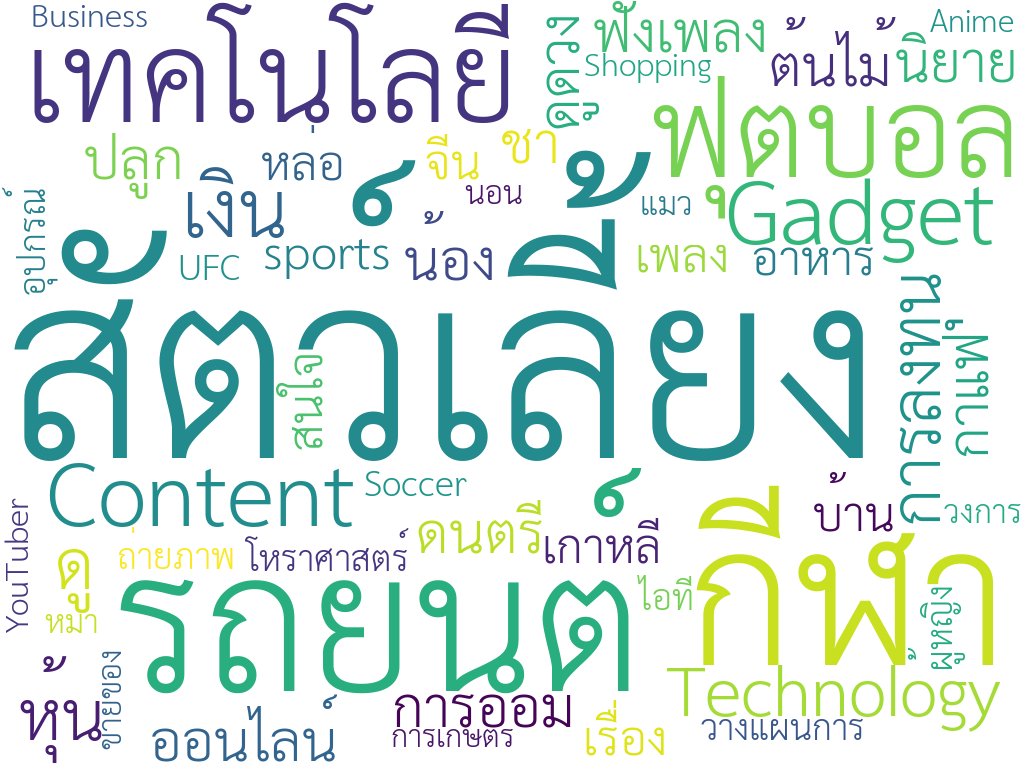

In [49]:
# Import the wordcloud library
from wordcloud import WordCloud
from os import path
# !wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
# !unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !apt install fonts-thai-tlwg
# Join the different processed titles together.
long_string = ' '.join(df['Remark_tokenized'].values)
# # Create a WordCloud object
# WordCloud(font_path='THSarabunNew.ttf',
#                       background_color="white",
#                       width=1024, # ‡∏Å‡∏ß‡πâ‡∏≤‡∏á
#                       height=768, # ‡∏¢‡∏≤‡∏ß
#                       collocations=False,
#                       regexp=r"[\u0E00-\u0E7Fa-zA-Z']+"
#                       ).generate(' '.join(df['Review_tokenized'].values()))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=1, contour_color='steelblue',font_path='THSarabunChula-Regular.ttf',
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", collocations=False,width=1024,height=768) 
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()